In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

np.set_printoptions(suppress=True)

## 1) 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
df_data=df_data.dropna()
```

In [4]:
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## 3) 切割訓練集與測試集

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## 資料前處理
- [Standardization平均&變異數標準化](#Standardization平均&變異數標準化)
- [MinMaxScaler最小最大值標準化](#MinMaxScaler最小最大值標準化)
- [MaxAbsScaler絕對值最大標準化](#MaxAbsScaler絕對值最大標準化)
- [RobustScaler](#RobustScaler)

### Standardization平均&變異數標準化
將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，方差為1。
適合的使用時機於當有些特徵的方差過大時，使用標準化能夠有效地讓模型快速收斂。

In [45]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X_train.mean(axis=0))
print('資料集 X 的標準差 : ', X_train.std(axis=0))

print('\nStandardScaler 縮放過後訓練集的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後訓練集的標準差 : ', X_train_scaled.std(axis=0))

資料集 X 的平均值 :  [5.87333333 3.0552381  3.7847619  1.20571429]
資料集 X 的標準差 :  [0.85882164 0.45502087 1.77553646 0.77383751]

StandardScaler 縮放過後訓練集的平均值 :  [ 0. -0. -0. -0.]
StandardScaler 縮放過後訓練集的標準差 :  [1. 1. 1. 1.]


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

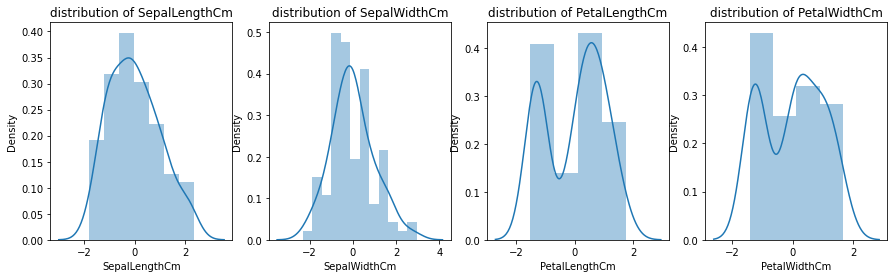

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_train_scaled[:,0], ax=axes[0])
sns.distplot(X_train_scaled[:,1], ax=axes[1])
sns.distplot(X_train_scaled[:,2], ax=axes[2])
sns.distplot(X_train_scaled[:,3], ax=axes[3])

axes[0].set(xlabel='SepalLengthCm', title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm', title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm', title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm', title="distribution of PetalWidthCm")

In [9]:
X_test_scaled = scaler.transform(X_test)

print('\nStandardScaler 縮放過後測試集的平均值 : ', X_test_scaled.mean(axis=0))
print('StandardScaler 縮放過後測試集的標準差 : ', X_test_scaled.std(axis=0))


StandardScaler 縮放過後測試集的平均值 :  [-0.11643861  0.01534903 -0.05024191 -0.02748619]
StandardScaler 縮放過後測試集的標準差 :  [0.85754489 0.83947065 0.96847064 0.9374037 ]


In [10]:
# 將縮放的資料還原
X_test_inverse = scaler.inverse_transform(X_test_scaled)

#### MinMaxScaler最小最大值標準化
在MinMaxScaler中是給定了一個明確的最大值與最小值。每個特徵中的最小值變成了0，最大值變成了1。數據會縮放到到[0,1]之間。

In [46]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
# scaled 之後的資料最小值、最大值  
print('資料集 X 的平均值 : ', X_train.mean(axis=0))
print('資料集 X 的最大值 : ', X_train.std(axis=0))

print('資料集 X 的最小值 : ', X_train.min(axis=0))
print('資料集 X 的最大值 : ', X_train.max(axis=0))

print('\nStandardScaler 縮放過後訓練集的最小值 : ', X_train_scaled.min(axis=0))
print('StandardScaler 縮放過後訓練集的最大值 : ', X_train_scaled.max(axis=0))

資料集 X 的平均值 :  [5.87333333 3.0552381  3.7847619  1.20571429]
資料集 X 的最大值 :  [0.85882164 0.45502087 1.77553646 0.77383751]
資料集 X 的最小值 :  [4.3 2.  1.1 0.1]
資料集 X 的最大值 :  [7.9 4.4 6.9 2.5]

StandardScaler 縮放過後訓練集的最小值 :  [0. 0. 0. 0.]
StandardScaler 縮放過後訓練集的最大值 :  [1. 1. 1. 1.]


In [48]:
X_test_scaled = scaler.transform(X_test)

print('\nStandardScaler 縮放過後測試集的最小值 : ', X_test_scaled.min(axis=0))
print('StandardScaler 縮放過後測試集的最大值 : ', X_test_scaled.max(axis=0))


StandardScaler 縮放過後測試集的最小值 :  [ 0.02777778  0.125      -0.01724138  0.04166667]
StandardScaler 縮放過後測試集的最大值 :  [0.83333333 0.83333333 0.89655172 0.95833333]


### MaxAbsScaler絕對值最大標準化
MaxAbsScaler 與 MinMaxScaler 類似，所有數據都會除以該列絕對值後的最大值。
數據會縮放到到[-1,1]之間。

In [16]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

In [51]:
X_test_scaled = scaler.transform(X_test)

## RobustScaler

算出四分位距，讓離均值不參與做計算
可以有效的縮放帶有outlier的數據，透過Robust如果數據中含有異常值在縮放中會捨去。

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

In [19]:
X_test_scaled = scaler.transform(X_test)